# Import Required Libraries
Import libraries such as pandas for data manipulation and matplotlib/seaborn for visualization.

In [24]:
# Import Required Libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For enhanced visualizations

# Set seaborn style for better visualizations
sns.set_theme(style="whitegrid")

# Load and Inspect Data
Load the CSV file into a pandas DataFrame and display the first few rows to understand the structure of the data.

In [25]:
# Load and Inspect Data

# Load the CSV file into a pandas DataFrame
file_path = "/home/marvin/repo/PlanCausal/output/experiments/experiment_results.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
data.head()

,Model,Makespan (vs Truth),avg abs start deviation,avg duration deviation,overall_sequence_similarity,seed,instance,priority_rule
0,TruthModel,9.0,817.0,3.4,0.953,1844,1000,dynamic
1,AverageOperationModel,-12.0,809.8,3.4,0.953,1844,1000,dynamic
2,LogNormalDistributionModel,4.0,841.8,3.3,0.953,1844,1000,dynamic
3,CausalModel,6.0,800.2,3.4,0.953,1844,1000,dynamic
4,TruthModel,71.0,856.7,3.9,0.960,1845,1000,dynamic


# Data Preprocessing
Filter and clean the data to ensure it is ready for analysis. Extract relevant columns and handle missing or inconsistent values if necessary.

In [26]:
# Data Preprocessing

# Filter relevant columns for analysis
columns_to_keep = [
    "Model", 
    'Makespan (vs Truth)', 
    #'avg operation shift': metrics['avg_start_shift'],
    'avg abs start deviation',
    'avg duration deviation',
    'overall_sequence_similarity',
]
filtered_data = data[columns_to_keep]

# Check for missing or inconsistent values
missing_values = filtered_data.isnull().sum()
print("Missing values per column:\n", missing_values)

# Drop rows with missing values (if any)
cleaned_data = filtered_data.dropna()

# Ensure data types are correct for analysis
print("Data types before conversion:\n", cleaned_data.dtypes)
cleaned_data[columns_to_keep[1:]] = cleaned_data[columns_to_keep[1:]].apply(pd.to_numeric, errors='coerce')
print("Data types after conversion:\n", cleaned_data.dtypes)

# Display the cleaned data for verification
cleaned_data.head()

Missing values per column:
 Model                          0
Makespan (vs Truth)            0
avg abs start deviation        0
avg duration deviation         0
overall_sequence_similarity    0
dtype: int64
Data types before conversion:
 Model                           object
Makespan (vs Truth)            float64
avg abs start deviation        float64
avg duration deviation         float64
overall_sequence_similarity    float64
dtype: object
Data types after conversion:
 Model                           object
Makespan (vs Truth)            float64
avg abs start deviation        float64
avg duration deviation         float64
overall_sequence_similarity    float64
dtype: object


,Model,Makespan (vs Truth),avg abs start deviation,avg duration deviation,overall_sequence_similarity
0,TruthModel,9.0,817.0,3.4,0.953
1,AverageOperationModel,-12.0,809.8,3.4,0.953
2,LogNormalDistributionModel,4.0,841.8,3.3,0.953
3,CausalModel,6.0,800.2,3.4,0.953
4,TruthModel,71.0,856.7,3.9,0.960


# Generate Boxplots for Each Metric
Create boxplots for each metric (Makespan (vs Truth), avg shift start operation, avg shift end operation, avg abs start deviation, avg duration deviation) grouped by the 'Model' column.

/tmp/ipykernel_1545200/1369393132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x="Model", y=metric, palette="Set2")  # Create the boxplot


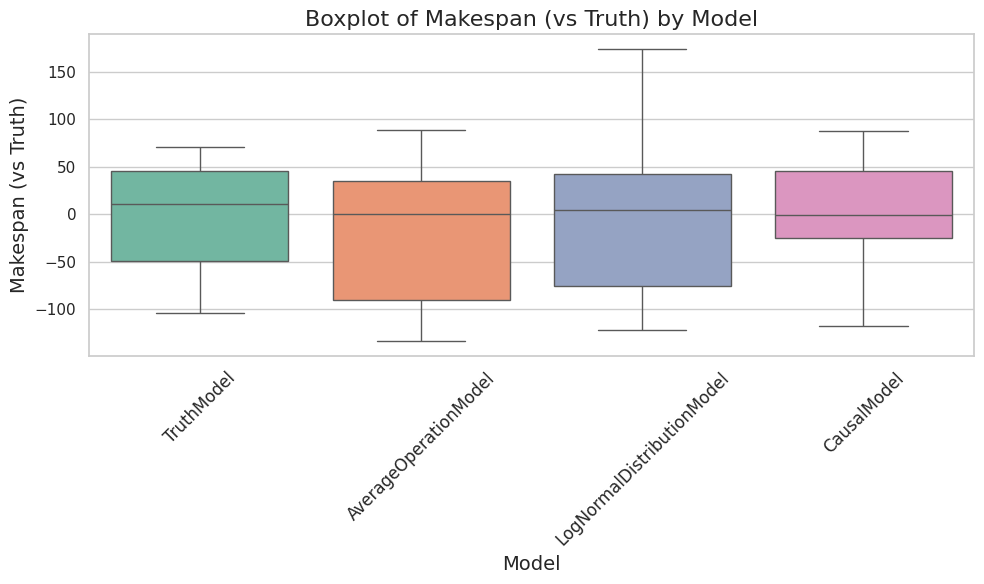

/tmp/ipykernel_1545200/1369393132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x="Model", y=metric, palette="Set2")  # Create the boxplot


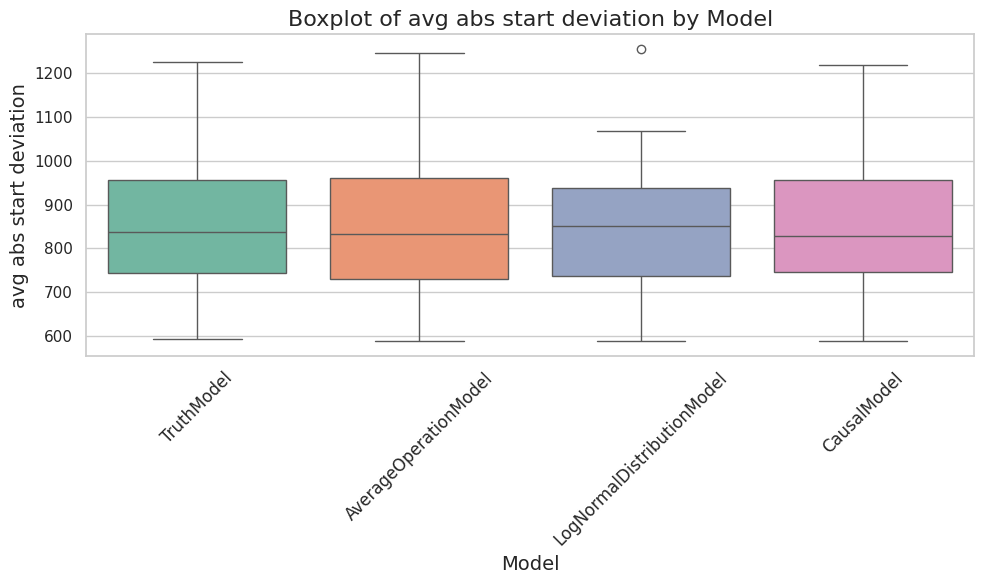

/tmp/ipykernel_1545200/1369393132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x="Model", y=metric, palette="Set2")  # Create the boxplot


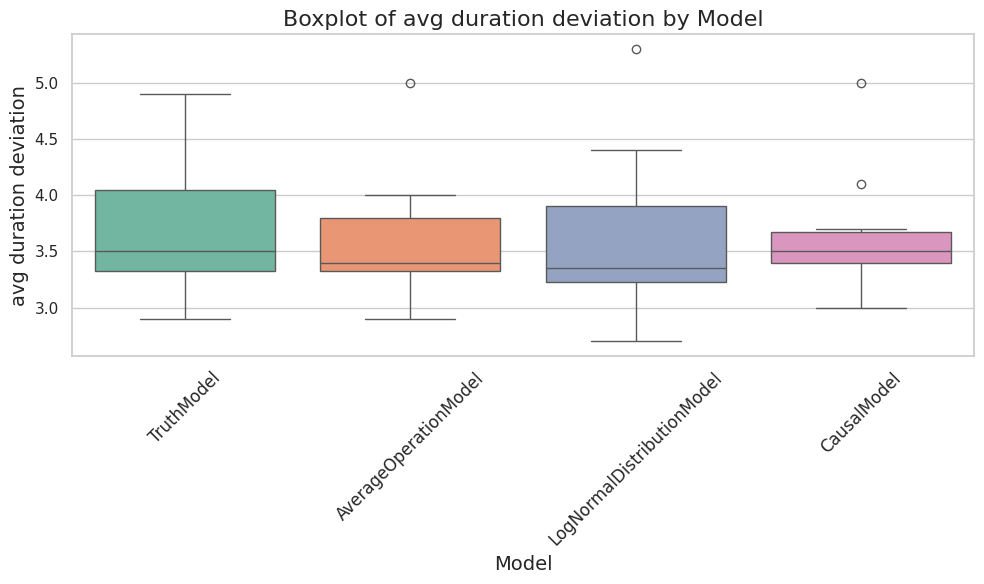

/tmp/ipykernel_1545200/1369393132.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x="Model", y=metric, palette="Set2")  # Create the boxplot


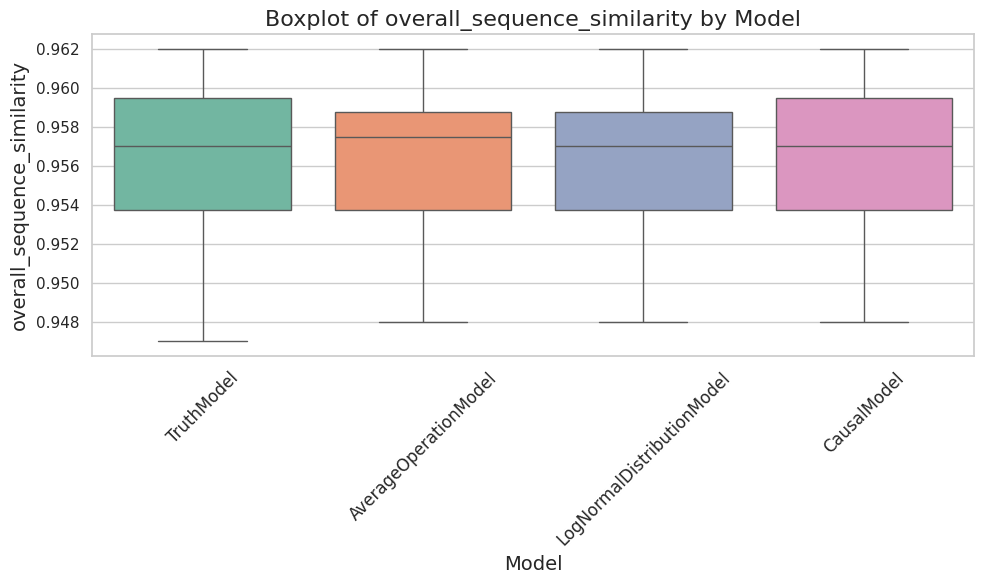

In [27]:
# Generate Boxplots for Each Metric

# Define the metrics to analyze
metrics = [
    'Makespan (vs Truth)', 
    #'avg operation shift': metrics['avg_start_shift'],
    'avg abs start deviation',
    'avg duration deviation',
    'overall_sequence_similarity',
]

# Create a boxplot for each metric grouped by the 'Model' column
for metric in metrics:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.boxplot(data=cleaned_data, x="Model", y=metric, palette="Set2")  # Create the boxplot
    plt.title(f"Boxplot of {metric} by Model", fontsize=16)  # Add a title
    plt.xlabel("Model", fontsize=14)  # Label the x-axis
    plt.ylabel(metric, fontsize=14)  # Label the y-axis
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

In [28]:
# Group by 'Model' and calculate descriptive statistics for each metric
describe_table = cleaned_data.groupby("Model").describe()

# Display the descriptive statistics table
describe_table

# Extract the mean values for each variable
mean_values = describe_table.xs('mean', level=1, axis=1)

# Display the mean values
mean_values

,Makespan (vs Truth),avg abs start deviation,avg duration deviation,overall_sequence_similarity
Model,,,,
AverageOperationModel,-21.4,852.95,3.61,0.9562
CausalModel,1.2,857.17,3.65,0.9562
LogNormalDistributionModel,4.7,866.58,3.63,0.9561
TruthModel,-4.3,856.52,3.69,0.9561


# Customize Visualizations
Enhance the visualizations by adding titles, axis labels, legends, and adjusting color schemes for better readability.

/tmp/ipykernel_1545200/3289634967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


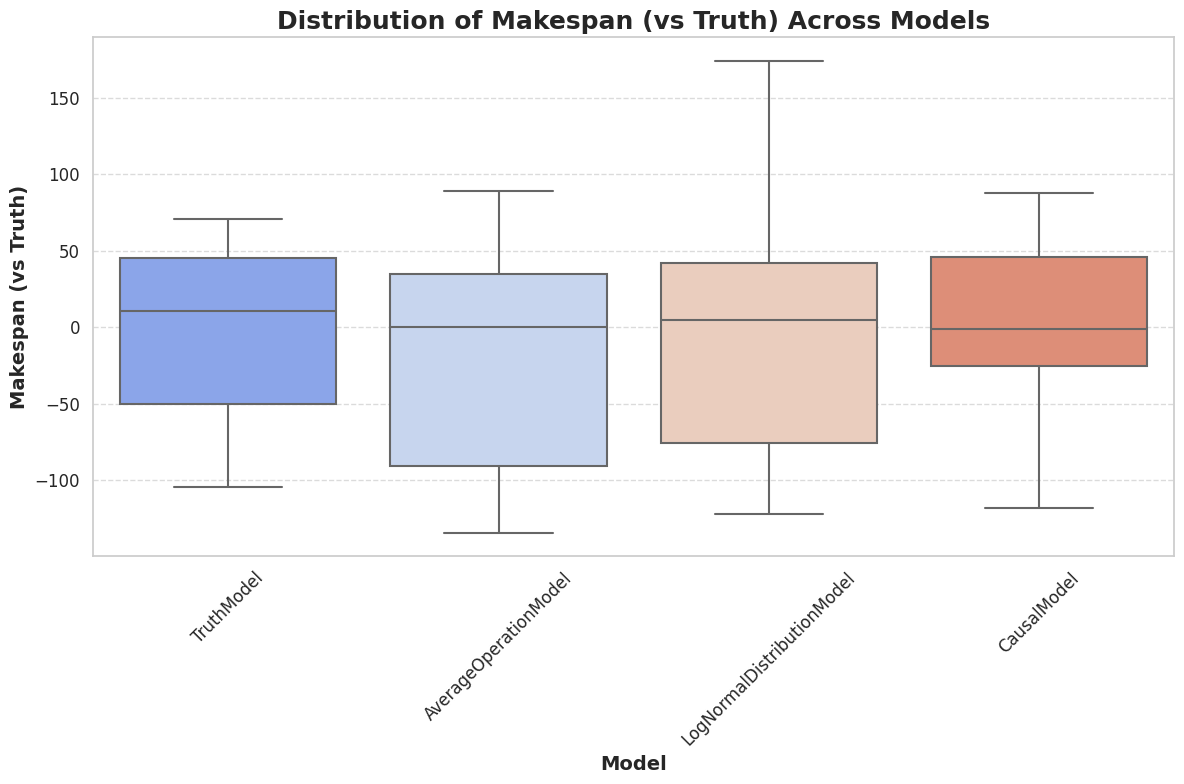

/tmp/ipykernel_1545200/3289634967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


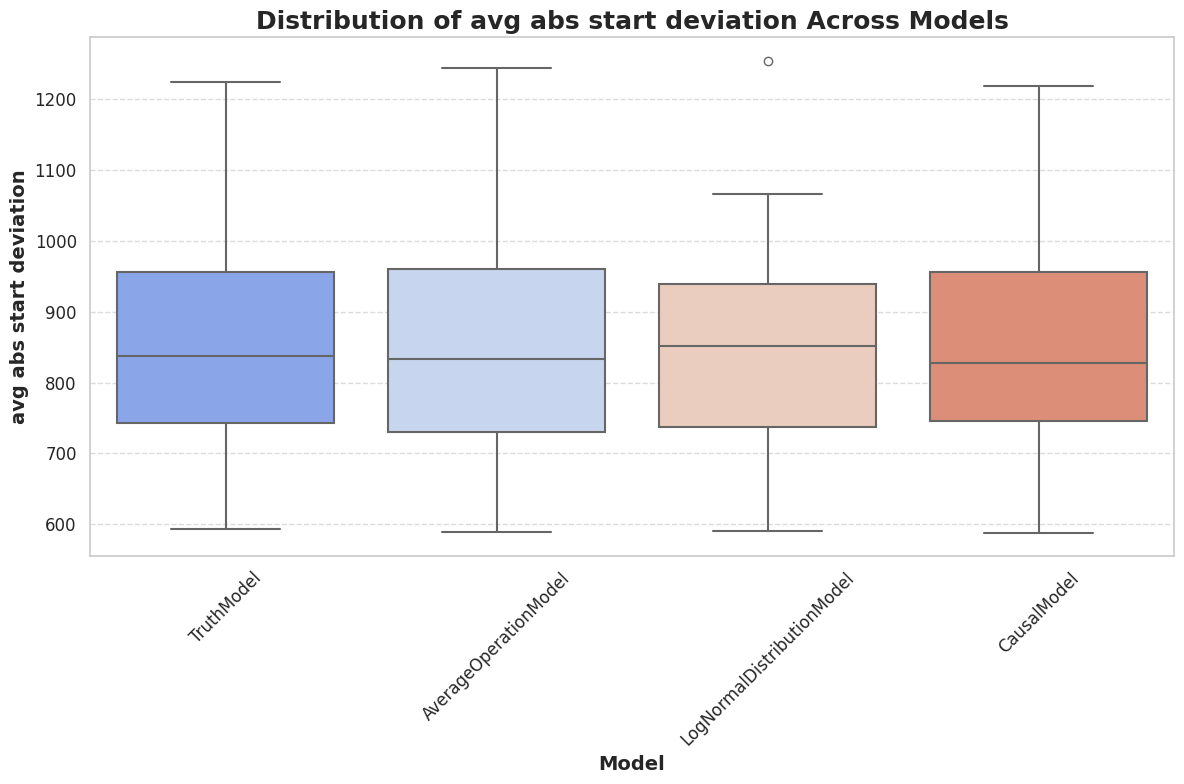

/tmp/ipykernel_1545200/3289634967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


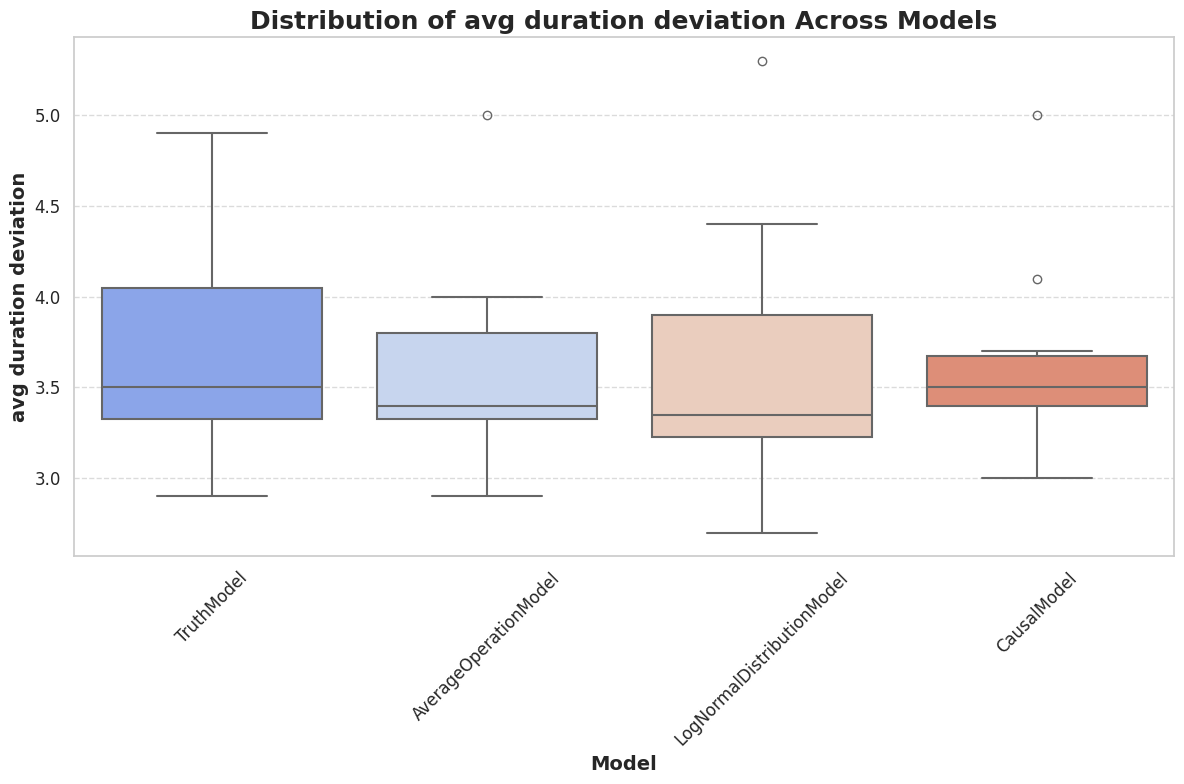

/tmp/ipykernel_1545200/3289634967.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


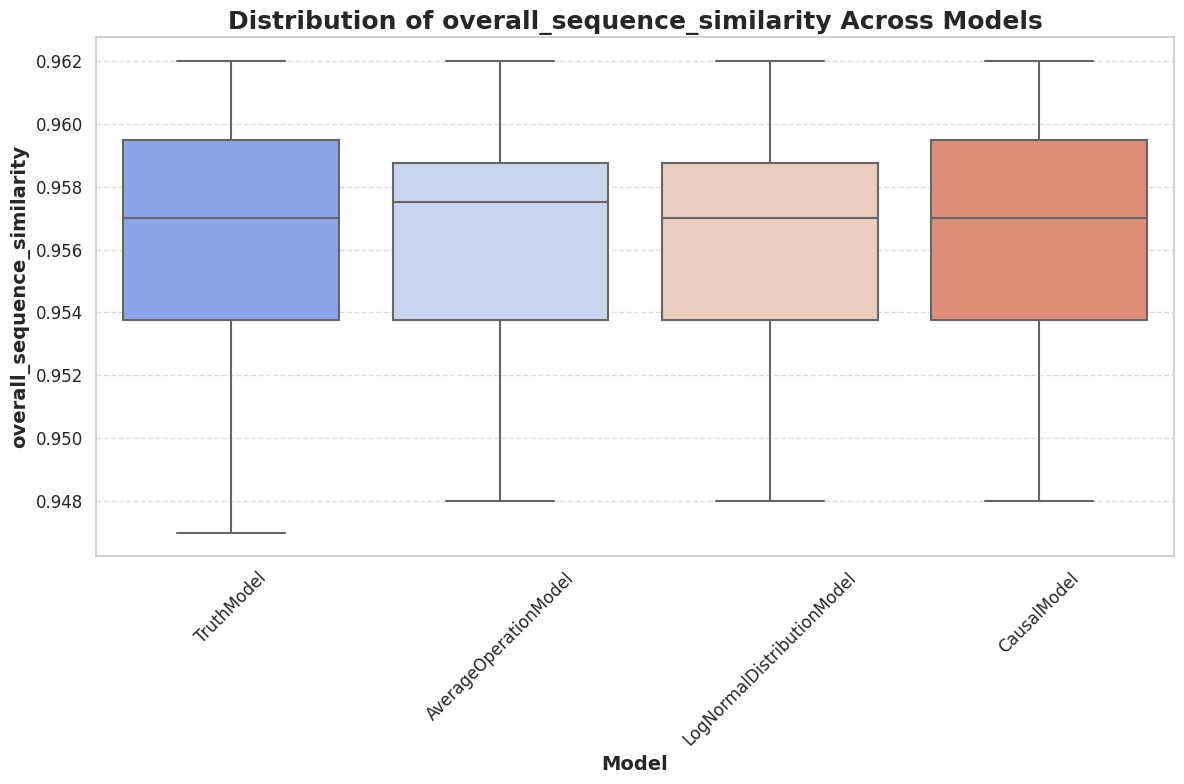

In [29]:
# Customize Visualizations

# Enhance the visualizations by adding titles, axis labels, legends, and adjusting color schemes for better readability
for metric in metrics:
    plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
    sns.boxplot(
        data=cleaned_data, 
        x="Model", 
        y=metric, 
        palette="coolwarm",  # Use a visually appealing color palette
        linewidth=1.5  # Add border width to the boxes
    )
    plt.title(f"Distribution of {metric} Across Models", fontsize=18, fontweight='bold')  # Add a bold title
    plt.xlabel("Model", fontsize=14, fontweight='bold')  # Bold x-axis label
    plt.ylabel(metric, fontsize=14, fontweight='bold')  # Bold y-axis label
    plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=12)  # Adjust y-axis tick font size
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the enhanced plot

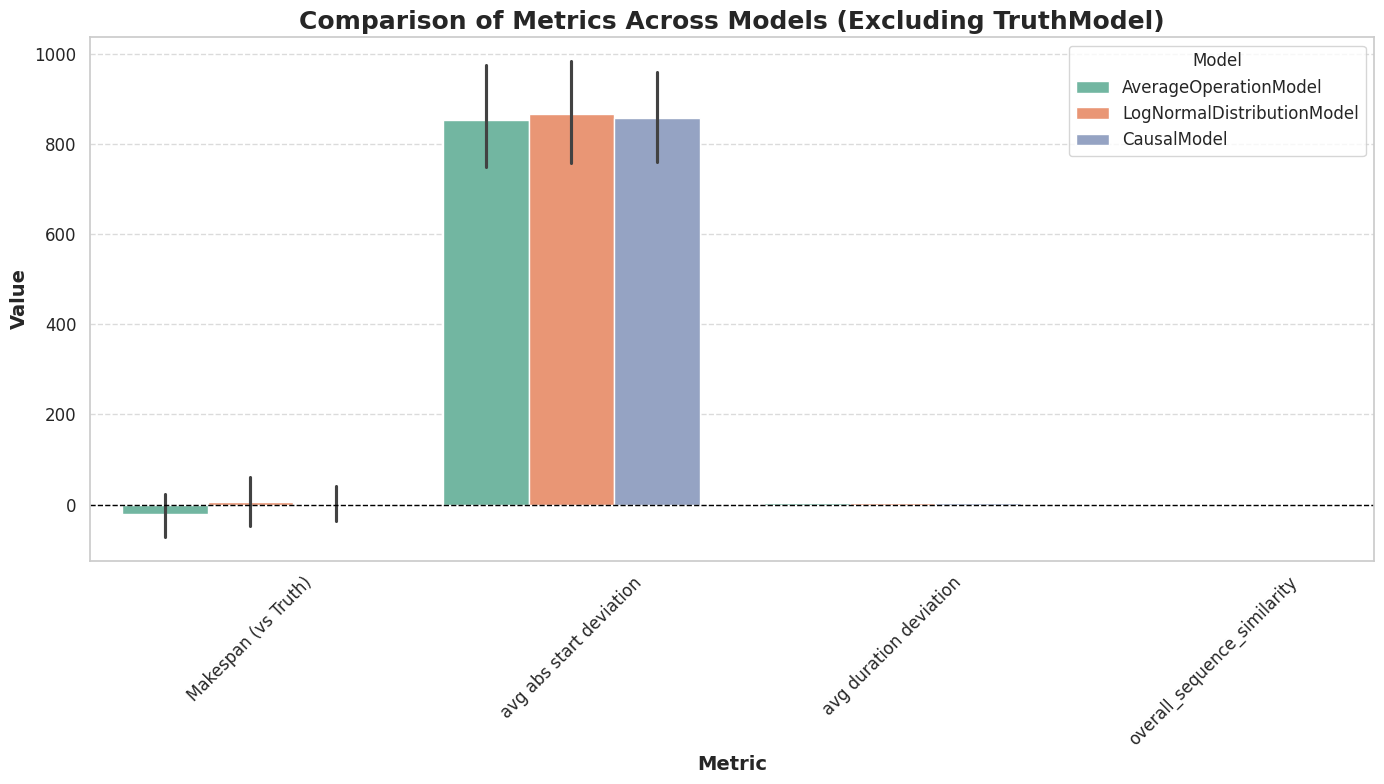

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the TruthModel from the cleaned data
comparison_data = cleaned_data[cleaned_data["Model"] != "TruthModel"]

# Melt the data for easier plotting with seaborn
melted_data = comparison_data.melt(
    id_vars="Model", 
    value_vars=[
        'Makespan (vs Truth)', 
        #'avg operation shift': metrics['avg_start_shift'],
        'avg abs start deviation',
        'avg duration deviation',
        'overall_sequence_similarity',
    ], 
    var_name="Metric", 
    value_name="Value"
)

# Mapping of Metrics to Descriptions:
# - Makespan Diff: Represents the difference in makespan between the approach and the truth schedule.
# - avg shift start operation → Avg Start Shift: Represents the average shift in operation start times compared to the truth schedule.
# - avg shift end operation → Avg End Shift: Represents the average shift in operation end times compared to the truth schedule.
# - avg abs start deviation → Avg Start Dev: Represents the average absolute deviation in operation start times compared to the truth schedule.
# - avg duration deviation → Avg Dur Dev: Represents the average deviation in operation durations compared to the truth schedule.

# Create a grouped bar chart
plt.figure(figsize=(14, 8))  # Set figure size
sns.barplot(
    data=melted_data, 
    x="Metric", 
    y="Value", 
    hue="Model", 
    palette="Set2"
)

# Add titles and labels
plt.title("Comparison of Metrics Across Models (Excluding TruthModel)", fontsize=18, fontweight="bold")
plt.xlabel("Metric", fontsize=14, fontweight="bold")
plt.ylabel("Value", fontsize=14, fontweight="bold")
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Add a reference line at zero
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title="Model", fontsize=12, loc="upper right")  # Add a legend
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for better readability

# Adjust layout and show the plot
plt.tight_layout()
plt.show()